# MACHINE LEARNING: DIGIT HANDWRITING RECOGNITION

AIM: To use machine learning to be able to identify handwriting of different digits and classify them appropriately

# PART A 
Downloading dependencies

In [2]:
#Dependencies

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import random
from numpy import arange
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
%matplotlib inline
from mnist import MNIST

#Import Dataset
mndata = MNIST('./data')
images_train,labels_train = mndata.load_training()
#images_test,labels_test = mndata.load_testing()

#Prep Data
training_data_images=np.array(images_train)
training_data_labels=np.array(labels_train)


#diplay_images
def displayImage(i):
    store = training_data_images[i]
    store = np.array(store, dtype='float')
    img = store.reshape((28, 28))
    plt.imshow(img, cmap='gray')
    plt.show()

#Display Classification
def displayClass(j):
    print(training_data_labels[j])


# PART B (i)

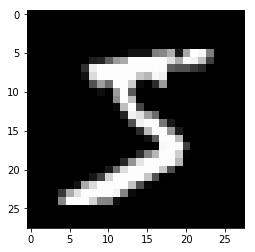

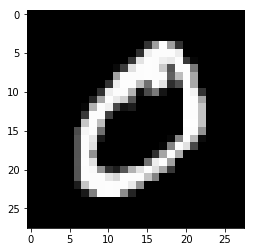

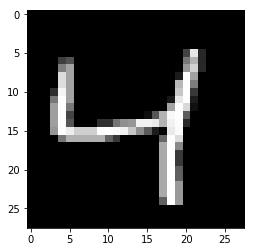

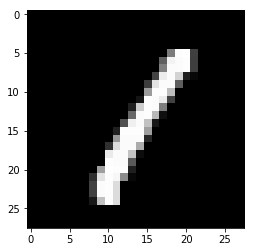

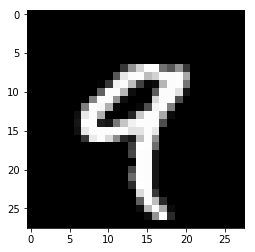

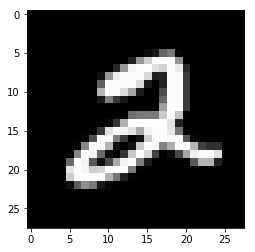

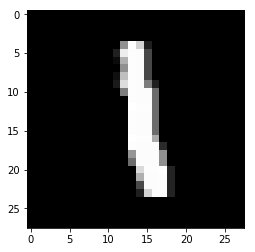

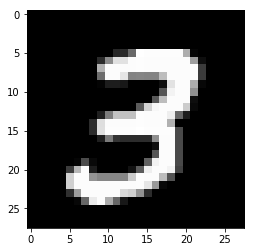

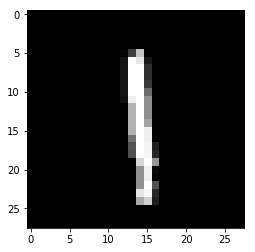

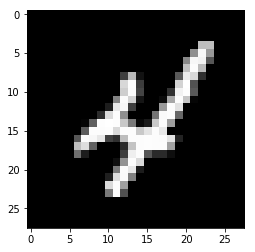

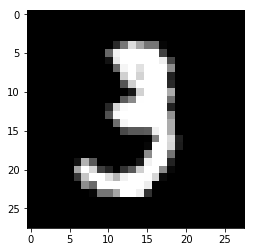

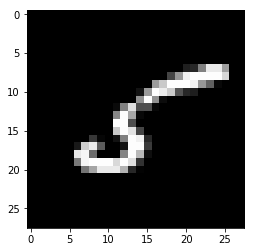

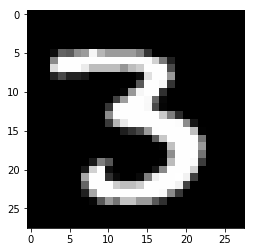

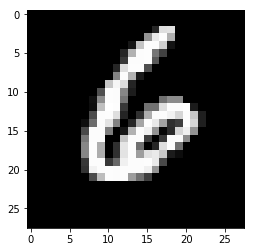

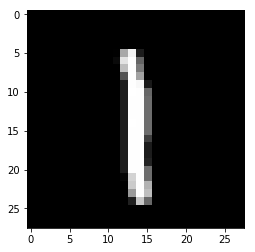

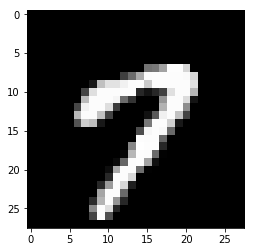

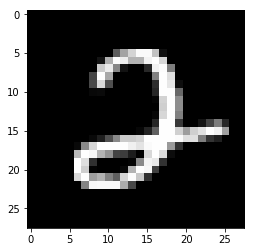

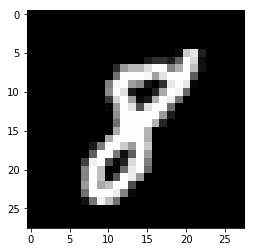

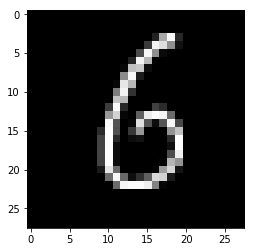

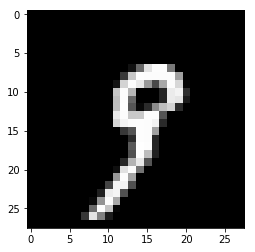

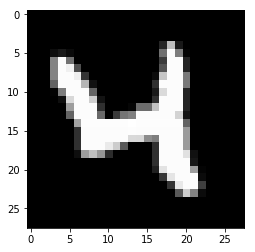

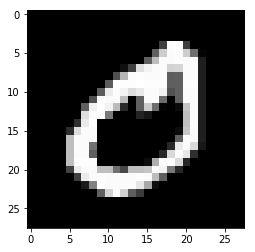

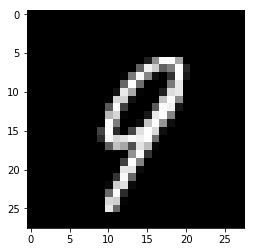

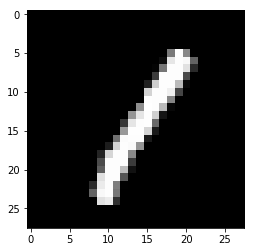

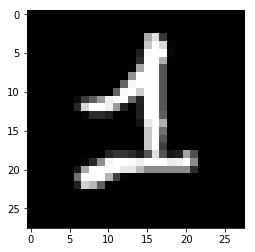

In [6]:
for i in range(0,25):
    displayImage(i)
     

No, All the Images of 9 do not look alike

# PART B (ii)

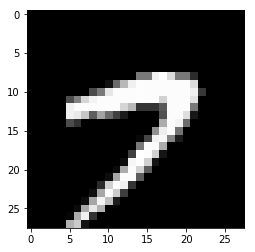

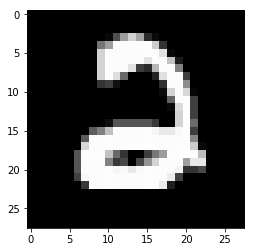

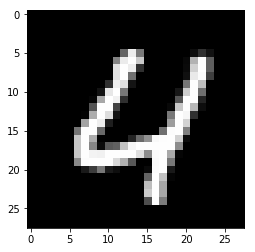

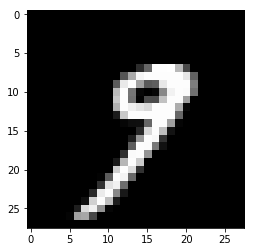

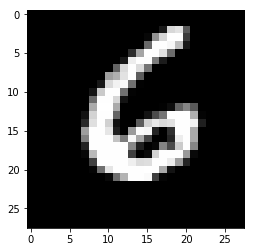

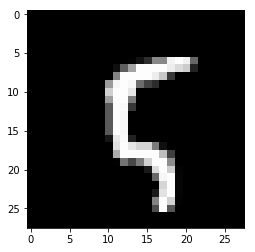

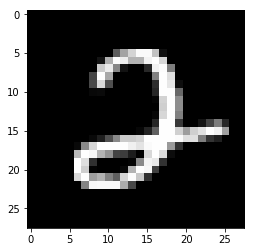

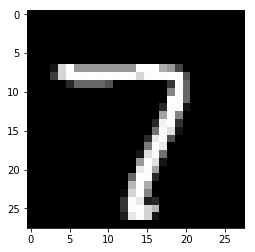

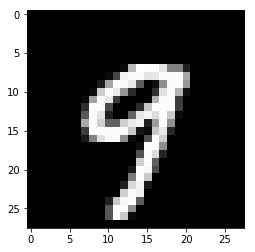

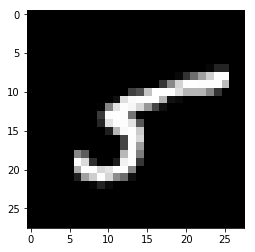

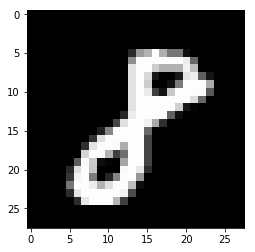

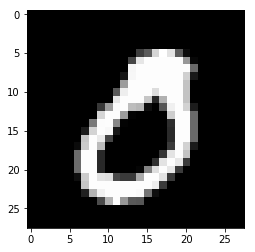

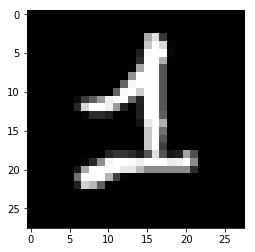

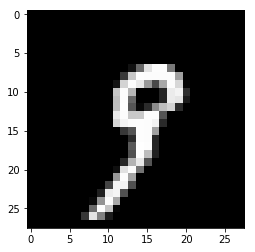

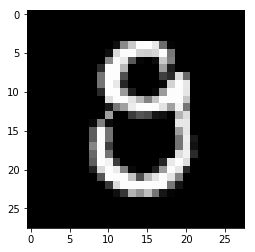

In [7]:
for i in range(15):
    j = random.randint(1,100)
    displayImage(j)

No, I got most of the images right (12/15)

# PART B (iii)

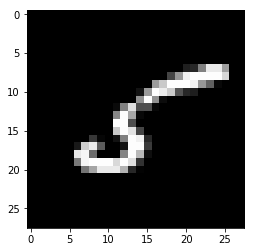

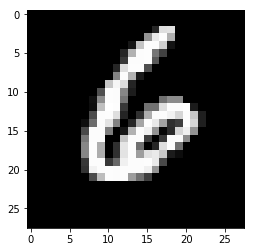

In [8]:
displayImage(11)
displayImage(13)

In [9]:
displayClass(11)
displayClass(13)

5
6


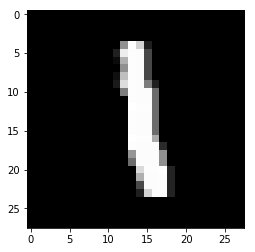

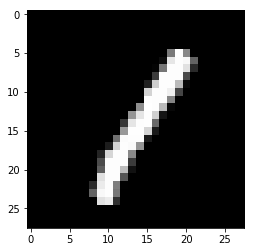

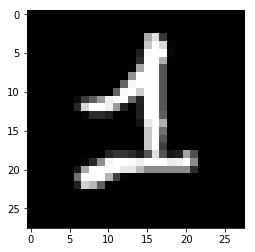

In [10]:
a = [6,23,24]
for i in a:
    displayImage(i)

In [11]:
 a = [6,23,24]
for i in a:
    displayClass(i)

1
1
1


The images of 5 and 6 are very similar and all the three images of one are significantly different. 

# PART C (i)

The nearest neighbhor of a train sample, assuming it is included in the training set would be the number itself.

# PART C (ii)

[[14563 14770 14505  9444  9724]
 [ 1609 12844 11364  2184  5816]
 [12578 11835  6380  1697 14992]
 [ 1877  2327 11791  4356  6357]
 [ 1732   914  7864 11956 11303]
 [ 3468  9815  9312 14154 14980]
 [11145    54 12070  2827 11378]
 [14815 11688  3186  4544  4158]
 [14233 14074  2885  9948 14189]
 [ 5044 13359  3970  9469  2453]]


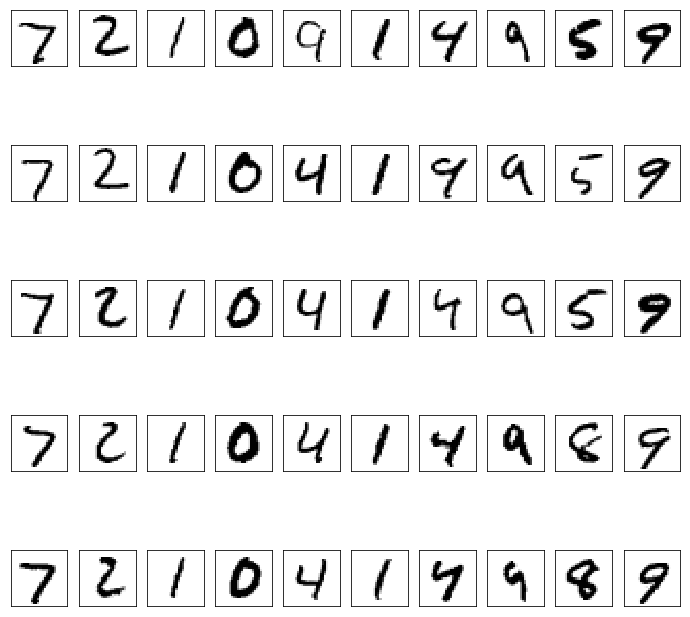

In [4]:
x_training, y_training = mndata.load_training()
x_testing, y_testing =mndata.load_testing()
x_training = np.array(x_training)
x_testing = np.array(x_testing)
nn = NearestNeighbors(n_neighbors=5,metric='euclidean').fit(x_training[:15000])
indices=nn.kneighbors(x_testing[0:10], return_distance=False)
fig, axes = plt.subplots(5, 10, figsize=(12, 12))

for i in range(5):
    for j in range(10):
        axes[i][j].imshow(x_training[indices[j][i]].reshape(28, 28), cmap='gray_r', interpolation='nearest')
        axes[i][j].set_xticks([])
        axes[i][j].set_yticks([])
 
 plt.show()

# PART C(iii)

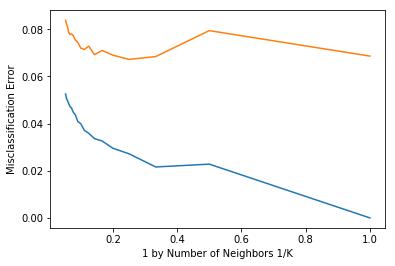

Minimum error is for K value of 4


In [14]:
#For K values 1 to 20 record misclassification error 
onebyk=[] 
errortrain=[]
errortest=[] 
for i in range(1,20,1):
    errortest.append(1-KNeighborsClassifier(n_neighbors=i).fit(x_training[:15000], np.asarray(y_training[:15000])).score(x_testing[:5000],np.asarray(y_testing[:5000])))
    errortrain.append(1-KNeighborsClassifier(n_neighbors=i).fit(x_training[:15000], np.asarray(y_training[:15000])).score(x_training[:15000],np.asarray(y_training[:15000])))
    onebyk.append(1/i)
# plot misclassification error vs k
plt.plot( onebyk,errortrain)
plt.plot( onebyk,errortest)
plt.xlabel('1 by Number of Neighbors 1/K')
plt.ylabel('Misclassification Error')
plt.show()
min=0
for i in range(len(errortest)):
    if errortest[min]>errortest[i]:
        min=i
print ("Minimum error is for K value of "+str(min+1))

Best error rate came for the value k = 4

# PART C (iv)

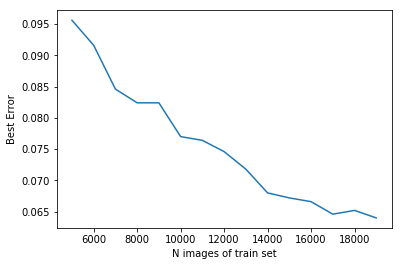

In [15]:
 N=[]
for i in range (1,1000,200):
        N.append(i)
onebyk
besterror=[]
Nvalues=[]
for i in range(5000,20000,1000):
    besterror.append(1-KNeighborsClassifier(n_neighbors=4, metric='euclidean', algorithm='ball_tree').fit(x_training[:i], np.asarray(y_training[:i])).score(x_testing[:5000],np.asarray(y_testing[:5000])))
    Nvalues.append(i)
# plot misclassification error vs k
plt.plot( Nvalues,besterror)
plt.xlabel('N images of train set')
plt.ylabel('Best Error')
plt.show()

# PART D

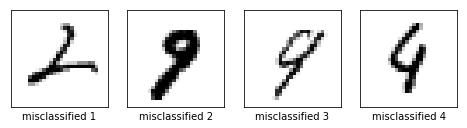

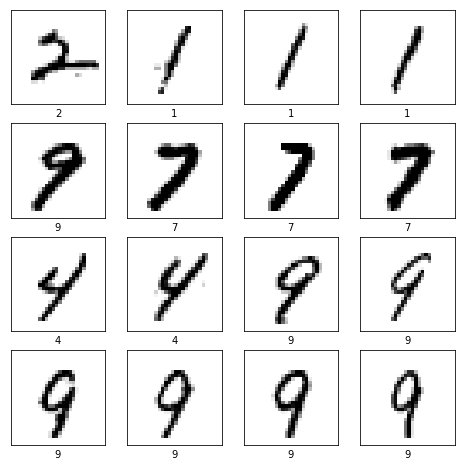

In [16]:
count = 0
knc = KNeighborsClassifier(n_neighbors=4).fit(x_training[:15000], np.asarray(y_training[:15000]))
i=0
misclassified=[]


while (count < 4):
    if y_testing[i]!=knc.predict([x_testing[i]]):
        misclassified.append(x_testing[i])
        count = count + 1
        i=i+1
    else: i=i+1

nn = NearestNeighbors(n_neighbors=5,metric='euclidean').fit(x_training[:15000])
knindices=nn.kneighbors(misclassified, return_distance=False)



#Print 4 Misclassified samples
#misclassified.shape
fig, axs = plt.subplots(1, 4, figsize=(8, 8))

for t in range(4):
        axs[t].imshow(misclassified[t].reshape(28, 28), cmap='gray_r', interpolation='nearest')
        axs[t].set_xticks([])
        axs[t].set_yticks([])
        axs[t].set_xlabel("misclassified "+str(t+1))
plt.show()


#Print K(4)Nearest neighbors of misclassified samples
fig, axs = plt.subplots(4, 4, figsize=(8, 8))
for e in range(4):
    for t in range(4):
        axs[e][t].imshow(x_training[knindices[e][t]].reshape(28, 28), cmap='gray_r', interpolation='nearest')
        axs[e][t].set_xticks([])
        axs[e][t].set_yticks([])
        axs[e][t].set_xlabel(y_training[knindices[e][t]])
plt.show()

# PART E i(A,B,C)

In [17]:
# A
manhattan = 1- KNeighborsClassifier(algorithm='ball_tree',n_neighbors=4,metric='manhattan',p=1).fit(x_training[:15000], np.asarray(y_training[:15000])).score(x_testing[:5000],np.asarray(y_testing[:5000]))
print (manhattan)
# B
import math
logP = 1- KNeighborsClassifier(algorithm='ball_tree',n_neighbors=4,metric='minkowski',p=math.pow(10,0.1)).fit(x_training[:15000], np.asarray(y_training[:15000])).score(x_testing[:5000],np.asarray(y_testing[:5000]))
print (logP)
# C 
chebyshev = 1- KNeighborsClassifier(algorithm='ball_tree',n_neighbors=4,metric='chebyshev').fit(x_training[:15000], np.asarray(y_training[:15000])).score(x_testing[:5000],np.asarray(y_testing[:5000]))
print (chebyshev)

0.084
0.0762
0.3006


# PART E (ii)

In [5]:
mahalanobis = 1- KNeighborsClassifier(algorithm='brute',metric_params={'VI':np.linalg.pinv(np.cov(np.array(x_training[:5000])))},n_neighbors=4,metric='mahalanobis').fit(x_training[:5000], np.asarray(y_training[:5000])).score(x_testing[:500],np.asarray(y_testing[:500]))

In [6]:
print (mahalanobis)

0.834


# PART E (iii)

In [ ]:
# Hausdroff Distance

# PART E (iv)

In [ ]:
# Hausdroff With varying distance 1,2,3 

# PART F

In [21]:
# Replaced Majoirty Polling with weighted distances and used it Euclidean, manhattan and Chebyshev  
chebyshev = 1- KNeighborsClassifier(algorithm='ball_tree',n_neighbors=4,metric='chebyshev',weights = 'distance' ).fit(x_training[:15000], np.asarray(y_training[:15000])).score(x_testing[:5000],np.asarray(y_testing[:5000]))
print (chebyshev)
manhattan = 1- KNeighborsClassifier(algorithm='ball_tree',n_neighbors=4,metric='manhattan',p=1,weights = 'distance').fit(x_training[:15000], np.asarray(y_training[:15000])).score(x_testing[:5000],np.asarray(y_testing[:5000]))
print (manhattan)
eucledian = (1-KNeighborsClassifier(n_neighbors=4, metric='euclidean', algorithm='ball_tree',weights = 'distance').fit(x_training[:i], np.asarray(y_training[:i])).score(x_testing[:5000],np.asarray(y_testing[:5000])))
print(eucledian)

0.2808
0.0752
0.3876


# PART G

Minimum error is for K value of 4 and  the lowest error rate was 0.02 